Create a new Python application

In [2]:
# Azure의 Custom Vision 라이브러리를 추가. 예측을 위하여 prediction을 포함
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
# OpenAPI 스펙에 맞춰서 Authentication을 처리할 수 있도록 해주는 코드
from msrest.authentication import ApiKeyCredentials
# Matplotlib의 pyplot을 포함하여 예측 결과를 그리기
from matplotlib import pyplot as plt
# Python Image 라이브러리로 이미지 그리기
from PIL import Image, ImageDraw, ImageFont
# Python Numpy (수학 및 과학 연산 패키지) 포함
import numpy as np
# 파일 처리 작업을 위해 os 라이브러리 포함
import os

Create variables for your resource's Azure endpoint and keys.

In [3]:
# 사용자가 만든 AI 모델의 예측 기능을 사용하기 위한 endpoint 지정
prediction_endpoint = "https://ps16044findbungee-prediction.cognitiveservices.azure.com"
# KEY 값 지정
prediction_key = "294K9fq5w1sYm8bHQTr2zdktIyMunTwOmvExOFydI5od4eHuQSztJQQJ99AJACYeBjFXJ3w3AAAIACOGcn74"
# 프로젝트 ID 지정
project_id = "d81a3d6c-4807-4913-82b1-13e46ebfcb42"
# 모델명 지정
model_name = "Iteration1"

Authenticate the client

In [4]:
# 앞에서 지정한 API KEY를 이용하여, 접속을 위한 credential 인스턴스 생성
credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key}   )
# endpoint 및 credential을 이용하여 predictor 인스턴스 생성
predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

Load image and get height, width and channels

In [5]:
# 테스트 이미지를 Codespace workspace에 추가한 후 image_file 변수로 지정
image_file = "./data/test-9.png"
# 이미지 파일 이름 출력
print('Detecting objects in ', image_file)
# Python Imaging Library의 image open함수를 써서 테스트 이미지 파일 오픈
image = Image.open(image_file)
# Numpy에서 이미지의 shape(높이, 폭, 채널) 읽기
h, w, ch = np.array(image).shape

print(h)
print(w)
print(ch)

Detecting objects in  ./data/test-9.png
788
1346
3


Detect objects in the test image

In [6]:
with open(image_file, mode="rb") as image_data:
    results = predictor.detect_image(project_id, model_name, image_data)

# Display the results.    
for prediction in results.predictions:
    print("\t" + prediction.tag_name + \
          ": {0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, \
          prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))

	Bungee: 99.82% bbox.left = 0.30, bbox.top = 0.52, bbox.width = 0.40, bbox.height = 0.43
	Bungee: 91.63% bbox.left = 0.25, bbox.top = 0.39, bbox.width = 0.48, bbox.height = 0.61
	Bungee: 60.64% bbox.left = 0.55, bbox.top = 0.36, bbox.width = 0.32, bbox.height = 0.61
	Bungee: 37.80% bbox.left = 0.27, bbox.top = 0.15, bbox.width = 0.67, bbox.height = 0.85
	Bungee: 33.77% bbox.left = 0.03, bbox.top = 0.05, bbox.width = 0.31, bbox.height = 0.95
	Bungee: 2.48% bbox.left = 0.02, bbox.top = 0.00, bbox.width = 0.27, bbox.height = 0.63
	Bungee: 1.51% bbox.left = 0.02, bbox.top = 0.07, bbox.width = 0.25, bbox.height = 0.25
	Bungee: 1.38% bbox.left = 0.72, bbox.top = 0.91, bbox.width = 0.28, bbox.height = 0.09


Create a figure for the results
Display the image with boxes around each detected object

Results saved in output.jpg


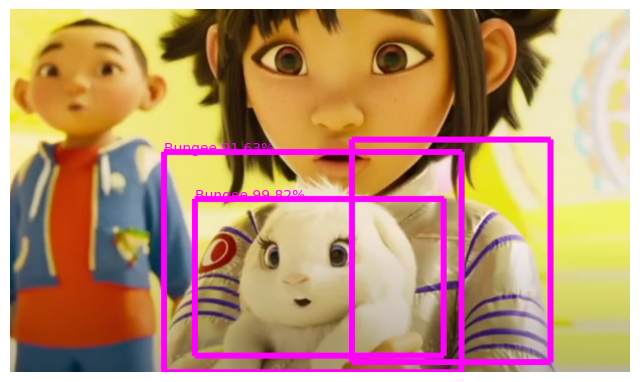

In [12]:
# 그래프 크기를 지정하고 축 비활성화
fig = plt.figure(figsize=(8,8))
plt.axis('off')

# 테스트 이미지 그리기
draw = ImageDraw.Draw(image)
lineWidth = int(w/100)
# 개체 인식 박스를 magenta로 지정
color = 'magenta'

for prediction in results. predictions:
    if (prediction.probability*100) > 80:       # 확률 임계치 조정

        left = prediction.bounding_box.left * w
        top = prediction.bounding_box.top * h
        width = prediction.bounding_box.width * w
        height = prediction.bounding_box.height * h

        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ' {0:.2f}%'.format(prediction.probability * 100), (left, top), color=color)
        
plt.imshow(image)
outputfile = 'output.jpg'
fig. savefig(outputfile)
print('Results saved in', outputfile)